### Preparing HDFS
Using magic

Create input folder on HDFS if not exists

Copy from data from local

In [1]:
! hadoop fs -mkdir -p  /tmp/input
! hadoop fs -put   -p  ./../data-clean/*.csv             /tmp/input         

 ### Check Spark Parameters

In [2]:
import org.apache.spark.sql.SparkSession
import org.apache.spark.{SparkConf,SparkContext}

// Set log level to ERROR (less verbose)
sc.setLogLevel("WARN")
val cs = spark.sparkContext.getConf
sc.getConf.toDebugString

Intitializing Scala interpreter ...

Spark Web UI available at http://b0c0236ce0ed:4040
SparkContext available as 'sc' (version = 2.4.5, master = local[*], app id = local-1591457837947)
SparkSession available as 'spark'


import org.apache.spark.sql.SparkSession
import org.apache.spark.{SparkConf, SparkContext}
cs: org.apache.spark.SparkConf = org.apache.spark.SparkConf@6c4d6d28
res0: String =
spark.app.id=local-1591457837947
spark.app.name=spylon-kernel
spark.driver.host=b0c0236ce0ed
spark.driver.memory=8g
spark.driver.port=35567
spark.executor.id=driver
spark.executor.memory=8g
spark.executor.memoryOverhead=8g
spark.master=local[*]
spark.memory.offHeap.enabled=true
spark.memory.offHeap.size=8g
spark.network.timeout=10000000
spark.rdd.compress=True
spark.repl.class.outputDir=/tmp/tmpxteknk8n
spark.repl.class.uri=spark://b0c0236ce0ed:35567/classes
spark.serializer.objectStreamReset=100
spark.storage.memoryFraction=0.4
spark.submit.deployMode=client
spark.ui.showConsoleProgress=true


In [3]:
// Load Clean Dataset into a DataFrame from HDFS after wrangling is completed
var df_clean = spark
    .read
    .format("csv")
    .option("header", "true")
    .load("hdfs://localhost:9000/tmp/input/*.csv")
df_clean.cache()

df_clean: org.apache.spark.sql.DataFrame = [Price: string, MethodOfSale: string ... 11 more fields]
res1: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Price: string, MethodOfSale: string ... 11 more fields]


In [4]:
df_clean = df_clean.withColumn("Price",col("Price").cast("Double"))
    .withColumn("Rooms",col("Rooms").cast("Int"))
    .withColumn("DistanceFromCBD",col("DistanceFromCBD").cast("Double"))
    .withColumn("MethodOfSale",col("MethodOfSale").cast("Int"))
    .withColumn("PropertyType",col("PropertyType").cast("Int"))
    .withColumn("Bathroom",col("Bathroom").cast("Int"))
    .withColumn("Car",col("Car").cast("Int"))
    .withColumn("Landsize",col("Landsize").cast("Double"))
    .withColumn("Latitude",col("Latitude").cast("Double"))
    .withColumn("Longtitude",col("Longtitude").cast("Double"))



df_clean: org.apache.spark.sql.DataFrame = [Price: double, MethodOfSale: int ... 11 more fields]


In [5]:
df_clean.cache()
df_clean.printSchema()

root
 |-- Price: double (nullable = true)
 |-- MethodOfSale: integer (nullable = true)
 |-- PropertyType: integer (nullable = true)
 |-- DistanceFromCBD: double (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Suburb: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- StreetName: string (nullable = true)



### Construct vectors from attributes
#### Transform Sale Date into a numeric value

In [6]:
df_clean = df_clean.withColumn("Date",unix_timestamp($"Date", "dd/mm/yyyy"))

df_clean: org.apache.spark.sql.DataFrame = [Price: double, MethodOfSale: int ... 11 more fields]


In [7]:
df_clean.toDF.createOrReplaceTempView("df_py_clean")

In [8]:
%%python
df_clean_p = spark.sql("select * from df_py_clean")
df_clean_p.show(5)

+---------+------------+------------+---------------+-----+--------+---+--------+--------+----------+----------+----------+-------------+
|    Price|MethodOfSale|PropertyType|DistanceFromCBD|Rooms|Bathroom|Car|Landsize|Latitude|Longtitude|    Suburb|      Date|   StreetName|
+---------+------------+------------+---------------+-----+--------+---+--------+--------+----------+----------+----------+-------------+
|1480000.0|           1|           1|            2.5|    2|       1|  1|   202.0|-37.7996|  144.9984|Abbotsford|1451779920|    Turner St|
|1035000.0|           1|           1|            2.5|    2|       1|  0|   156.0|-37.8079|  144.9934|Abbotsford|1451865720| Bloomburg St|
|1465000.0|           2|           1|            2.5|    3|       2|  0|   134.0|-37.8093|  144.9944|Abbotsford|1483488180|   Charles St|
| 850000.0|           3|           1|            2.5|    3|       2|  1|    94.0|-37.7969|  144.9969|Abbotsford|1483488180|Federation La|
|1600000.0|           6|          

In [9]:
! pip install matplotlib
! pip install pandas







     |                                | 10 kB 4.4 MB/s eta 0:00:03

     |                                | 20 kB 1.3 MB/s eta 0:00:10

     |                                | 30 kB 1.4 MB/s eta 0:00:10

     |                                | 40 kB 1.7 MB/s eta 0:00:08

     |                                | 51 kB 1.5 MB/s eta 0:00:09

     |                                | 61 kB 1.7 MB/s eta 0:00:08

     |                                | 71 kB 2.0 MB/s eta 0:00:07

     |                                | 81 kB 1.9 MB/s eta 0:00:07

     |                                | 92 kB 1.9 MB/s eta 0:00:07

     |                                | 102 kB 2.1 MB/s eta 0:00:06

     |                                | 112 kB 2.1 MB/s eta 0:00:06

     |                                | 122 kB 2.1 MB/s eta 0:00:06

     |                                | 133 kB 2.1 MB/s eta 0:00:06

     |                                | 143 kB 2.1 MB/s eta 0:00:06

     |                               


     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.2 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.3 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.3 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.3 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.3 MB 2.1 MB/s eta 0:00:06

     |###                             | 1.3 MB 2.1 MB/s eta 0:00:06

     |###                        


     |######                          | 2.3 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.3 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.4 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.5 MB 2.1 MB/s eta 0:00:05

     |######                          | 2.5 MB 2.1 MB/s eta 0:00:05

     |######                     


     |#########                       | 3.5 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.5 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.5 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.5 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.5 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                       | 3.6 MB 2.1 MB/s eta 0:00:05

     |#########                  


     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.7 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############                    | 4.8 MB 3.1 MB/s eta 0:00:03

     |############               


     |###############                 | 5.8 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.8 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 5.9 MB 3.1 MB/s eta 0:00:03

     |###############                 | 6.0 MB 3.1 MB/s eta 0:00:03

     |###############                 | 6.0 MB 3.1 MB/s eta 0:00:03

     |###############            


     |##################              | 7.0 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.0 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.0 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.0 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.0 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################              | 7.1 MB 3.1 MB/s eta 0:00:02

     |##################         


     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.2 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################           | 8.3 MB 3.1 MB/s eta 0:00:02

     |#####################      


     |########################        | 9.3 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.3 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 3.1 MB/s eta 0:00:01

     |########################        | 9.4 MB 5.2 MB/s eta 0:00:01

     |########################        | 9.5 MB 5.2 MB/s eta 0:00:01

     |########################        | 9.5 MB 5.2 MB/s eta 0:00:01

     |########################        | 9.5 MB 5.2 MB/s eta 0:00:01

     |########################   


     |###########################     | 10.5 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.5 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.5 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.5 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.5 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |###########################     | 10.6 MB 5.2 MB/s eta 0:00:01

     |#############


     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.7 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.8 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.8 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.8 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.8 MB 5.2 MB/s eta 0:00:01

     |##############################  | 11.8 MB 5.2 MB/s eta 0:00:01

     |#############


     |                                | 399 kB 8.8 MB/s eta 0:00:03

     |                                | 409 kB 8.8 MB/s eta 0:00:03

     |                                | 419 kB 8.8 MB/s eta 0:00:03

     |                                | 430 kB 8.8 MB/s eta 0:00:03

     |                                | 440 kB 8.8 MB/s eta 0:00:03

     |                                | 450 kB 8.8 MB/s eta 0:00:03

     |                                | 460 kB 8.8 MB/s eta 0:00:03

     |                                | 471 kB 8.8 MB/s eta 0:00:03

     |                                | 481 kB 8.8 MB/s eta 0:00:03

     |                                | 491 kB 8.8 MB/s eta 0:00:03

     |                                | 501 kB 8.8 MB/s eta 0:00:03

     |                                | 512 kB 8.8 MB/s eta 0:00:03

     |                                | 522 kB 8.8 MB/s eta 0:00:03

     |                                | 532 kB 8.8 MB/s eta 0:00:03

     |                           


     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.6 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.7 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.7 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.7 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.7 MB 8.8 MB/s eta 0:00:03

     |##                              | 1.7 MB 8.8 MB/s eta 0:00:03

     |##                         


     |####                            | 2.7 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.7 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.8 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.9 MB 8.8 MB/s eta 0:00:02

     |####                            | 2.9 MB 8.8 MB/s eta 0:00:02

     |####                       


     |######                          | 3.9 MB 8.8 MB/s eta 0:00:02

     |######                          | 3.9 MB 8.8 MB/s eta 0:00:02

     |######                          | 3.9 MB 8.8 MB/s eta 0:00:02

     |######                          | 3.9 MB 8.8 MB/s eta 0:00:02

     |######                          | 3.9 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                          | 4.0 MB 8.8 MB/s eta 0:00:02

     |######                     


     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.1 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                        | 5.2 MB 8.8 MB/s eta 0:00:02

     |########                   


     |#########                       | 6.2 MB 8.1 MB/s eta 0:00:02

     |#########                       | 6.2 MB 8.1 MB/s eta 0:00:02

     |#########                       | 6.3 MB 8.1 MB/s eta 0:00:02

     |#########                       | 6.3 MB 8.1 MB/s eta 0:00:02

     |#########                       | 6.3 MB 8.1 MB/s eta 0:00:02

     |#########                       | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.3 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.4 MB 8.1 MB/s eta 0:00:02

     |##########                      | 6.4 MB 8.1 MB/s eta 0:00:02

     |##########                 


     |###########                     | 7.4 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.4 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.4 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.4 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.4 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                     | 7.5 MB 8.1 MB/s eta 0:00:02

     |###########                


     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.6 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############                   | 8.7 MB 8.1 MB/s eta 0:00:02

     |#############              


     |###############                 | 9.7 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.7 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.8 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.9 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.9 MB 8.1 MB/s eta 0:00:02

     |###############                 | 9.9 MB 8.1 MB/s eta 0:00:02

     |###############            


     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 10.9 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#################               | 11.0 MB 8.1 MB/s eta 0:00:02

     |#############


     |###################             | 12.1 MB 8.1 MB/s eta 0:00:02

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:02

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.1 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.2 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.2 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.2 MB 8.1 MB/s eta 0:00:01

     |###################             | 12.2 MB 8.1 MB/s eta 0:00:01

     |#############


     |####################            | 13.2 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.2 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.2 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.2 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#####################           | 13.3 MB 7.0 MB/s eta 0:00:01

     |#############


     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.4 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.5 MB 7.0 MB/s eta 0:00:01

     |######################          | 14.5 MB 7.0 MB/s eta 0:00:01

     |#######################         | 14.5 MB 7.0 MB/s eta 0:00:01

     |#######################         | 14.5 MB 7.0 MB/s eta 0:00:01

     |#######################         | 14.5 MB 7.0 MB/s eta 0:00:01

     |#############


     |########################        | 15.5 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.5 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.5 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.6 MB 7.0 MB/s eta 0:00:01

     |########################        | 15.7 MB 7.0 MB/s eta 0:00:01

     |#############


     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.7 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |##########################      | 16.8 MB 7.0 MB/s eta 0:00:01

     |#############


     |############################    | 17.8 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.8 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 17.9 MB 7.0 MB/s eta 0:00:01

     |############################    | 18.0 MB 7.0 MB/s eta 0:00:01

     |############################    | 18.0 MB 7.0 MB/s eta 0:00:01

     |############################    | 18.0 MB 7.0 MB/s eta 0:00:01

     |#############


     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.0 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |##############################  | 19.1 MB 6.0 MB/s eta 0:00:01

     |#############

















     |###                             | 10 kB 4.1 MB/s eta 0:00:01

     |#######                         | 20 kB 3.3 MB/s eta 0:00:01

     |###########                     | 30 kB 4.7 MB/s eta 0:00:01

     |##############                  | 40 kB 5.8 MB/s eta 0:00:01

     |##################              | 51 kB 6.8 MB/s eta 0:00:01

     |######################          | 61 kB 7.8 MB/s eta 0:00:01

     |#########################       | 71 kB 8.0 MB/s eta 0:00:01

     |#############################   | 81 kB 8.9 MB/s eta 0:00:01

     |################################| 88 kB 5.1 MB/s 














     |                                | 10 kB 4.5 MB/s eta 0:00:03

     |                                | 20 kB 928 kB/s eta 0:00:11

     |                                | 30 kB 1.4 MB/s eta 0:00:08

     |                                | 40 kB 1.7 MB/s eta 0:00:07

     |                                | 51 kB 1.4 MB/s eta 0:00:08

     |                        


     |###                             | 972 kB 2.0 MB/s eta 0:00:05

     |###                             | 983 kB 2.0 MB/s eta 0:00:05

     |###                             | 993 kB 2.0 MB/s eta 0:00:05

     |###                             | 1.0 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.0 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.0 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.0 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.0 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                             | 1.1 MB 2.0 MB/s eta 0:00:05

     |###                        


     |######                          | 2.1 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |######                          | 2.2 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.2 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.2 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.2 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.2 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.3 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.3 MB 2.0 MB/s eta 0:00:04

     |#######                         | 2.3 MB 2.0 MB/s eta 0:00:04

     |#######                    


     |##########                      | 3.3 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.3 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.3 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.3 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.3 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                      | 3.4 MB 2.0 MB/s eta 0:00:04

     |##########                 


     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.5 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############                  | 4.6 MB 2.0 MB/s eta 0:00:03

     |##############             


     |#################               | 5.6 MB 5.7 MB/s eta 0:00:01

     |#################               | 5.7 MB 5.7 MB/s eta 0:00:01

     |#################               | 5.7 MB 5.7 MB/s eta 0:00:01

     |#################               | 5.7 MB 5.7 MB/s eta 0:00:01

     |#################               | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.7 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.8 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.8 MB 5.7 MB/s eta 0:00:01

     |##################              | 5.8 MB 5.7 MB/s eta 0:00:01

     |##################         


     |#####################           | 6.8 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.8 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.8 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.8 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |#####################           | 6.9 MB 5.7 MB/s eta 0:00:01

     |######################     


     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.0 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################       | 8.1 MB 5.7 MB/s eta 0:00:01

     |#########################  


     |############################    | 9.1 MB 5.7 MB/s eta 0:00:01

     |############################    | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.2 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.3 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.3 MB 5.7 MB/s eta 0:00:01

     |#############################   | 9.3 MB 5.7 MB/s eta 0:00:01

     |###########################


     |###########                     | 184 kB 5.0 MB/s eta 0:00:01

     |############                    | 194 kB 5.0 MB/s eta 0:00:01

     |############                    | 204 kB 5.0 MB/s eta 0:00:01

     |#############                   | 215 kB 5.0 MB/s eta 0:00:01

     |##############                  | 225 kB 5.0 MB/s eta 0:00:01

     |##############                  | 235 kB 5.0 MB/s eta 0:00:01

     |###############                 | 245 kB 5.0 MB/s eta 0:00:01

     |################                | 256 kB 5.0 MB/s eta 0:00:01

     |################                | 266 kB 5.0 MB/s eta 0:00:01

     |#################               | 276 kB 5.0 MB/s eta 0:00:01

     |#################               | 286 kB 5.0 MB/s eta 0:00:01

     |##################              | 296 kB 5.0 MB/s eta 0:00:01

     |###################             | 307 kB 5.0 MB/s eta 0:00:01

     |###################             | 317 kB 5.0 MB/s eta 0:00:01

     |####################       

<IPython.core.display.Javascript object>


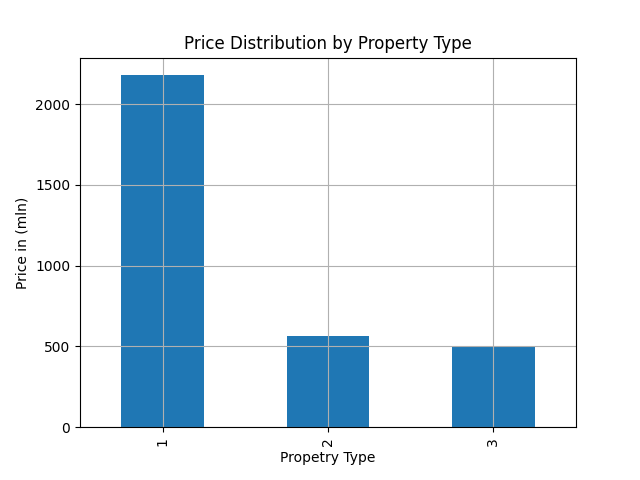

In [10]:
%matplotlib notebook 
%%python

import pandas as pd
import matplotlib.pyplot as plt

df_clean_pd = df_clean_p.toPandas() 

# 1 -House, 2- Unit, 3 -Townhouse
ax = df_clean_pd.groupby("PropertyType")["Price"].nunique().plot(kind="bar")
ax.set_ylabel("Price in (mln)")
ax.set_xlabel("Propetry Type")
plt.grid()
plt.title("Price Distribution by Property Type")
plt.show()

#### Set FeatureHasher for Suburb, StreetName

In [11]:
import org.apache.spark.ml.feature.{FeatureHasher,OneHotEncoder,StandardScaler,VectorAssembler}

val hasher = new FeatureHasher()
 .setInputCols("StreetName","Suburb")
 .setOutputCol("str_name_suburb_vec")

import org.apache.spark.ml.feature.{FeatureHasher, OneHotEncoder, StandardScaler, VectorAssembler}
hasher: org.apache.spark.ml.feature.FeatureHasher = featureHasher_92f1c3171840


#### Set OneHotEncoders for PropertyType, MethodOfSale

In [12]:
val ms_encoder = new OneHotEncoder()
      .setInputCol("MethodOfSale")
      .setOutputCol("m_sale_vec")

val pt_encoder = new OneHotEncoder()
      .setInputCol("PropertyType")
      .setOutputCol("pt_vec")


ms_encoder: org.apache.spark.ml.feature.OneHotEncoder = oneHot_cee832cfec0a
pt_encoder: org.apache.spark.ml.feature.OneHotEncoder = oneHot_cef905298d65


#### Assemble the columns and column vectors into a single column - "features"

In [13]:
val columns = Array("DistanceFromCBD", "Rooms", "Bathroom", "Car", "Landsize", "Latitude", "Longtitude", "Date", 
                    "str_name_suburb_vec", "m_sale_vec", "pt_vec")

val assembler = new VectorAssembler()
            .setInputCols(columns)
            .setOutputCol("features")

val dd = hasher.transform(df_clean).drop("StreetName","Suburb")


columns: Array[String] = Array(DistanceFromCBD, Rooms, Bathroom, Car, Landsize, Latitude, Longtitude, Date, str_name_suburb_vec, m_sale_vec, pt_vec)
assembler: org.apache.spark.ml.feature.VectorAssembler = vecAssembler_a43d6c282929
dd: org.apache.spark.sql.DataFrame = [Price: double, MethodOfSale: int ... 10 more fields]


In [14]:
val mm = ms_encoder.transform(dd).drop("MethodOfSale")


mm: org.apache.spark.sql.DataFrame = [Price: double, PropertyType: int ... 10 more fields]


In [15]:
val pt = pt_encoder.transform(mm)


pt: org.apache.spark.sql.DataFrame = [Price: double, PropertyType: int ... 11 more fields]


In [16]:
val feature_ds = assembler.transform(pt).drop("DistanceFromCBD", "Rooms", "Bathroom", "Car", "Landsize", "Latitude", "Longtitude", "Date", 
                    "str_name_suburb_vec", "m_sale_vec", "pt_vec")
feature_ds.cache()

feature_ds: org.apache.spark.sql.DataFrame = [Price: double, PropertyType: int ... 1 more field]
res4: feature_ds.type = [Price: double, PropertyType: int ... 1 more field]


In [17]:
feature_ds.show()

+---------+------------+--------------------+
|    Price|PropertyType|            features|
+---------+------------+--------------------+
|1480000.0|           1|(262163,[0,1,2,3,...|
|1035000.0|           1|(262163,[0,1,2,4,...|
|1465000.0|           1|(262163,[0,1,2,4,...|
| 850000.0|           1|(262163,[0,1,2,3,...|
|1600000.0|           1|(262163,[0,1,2,3,...|
| 941000.0|           1|(262163,[0,1,2,4,...|
|1876000.0|           1|(262163,[0,1,2,4,...|
|1636000.0|           1|(262163,[0,1,2,3,...|
|1097000.0|           1|(262163,[0,1,2,3,...|
|1350000.0|           1|(262163,[0,1,2,3,...|
|1172500.0|           1|(262163,[0,1,2,3,...|
|1310000.0|           1|(262163,[0,1,2,3,...|
|1200000.0|           1|(262163,[0,1,2,3,...|
|1176500.0|           1|(262163,[0,1,2,3,...|
| 955000.0|           1|(262163,[0,1,2,4,...|
| 890000.0|           1|(262163,[0,1,2,3,...|
|1330000.0|           1|(262163,[0,1,2,3,...|
|1090000.0|           2|(262163,[0,1,2,3,...|
|1100000.0|           1|(262163,[0

#### Set StandardScaler

In [18]:
val scaler = new StandardScaler()
      .setInputCol("features")
      .setOutputCol("scaledFeatures")
      .setWithStd(true).setWithMean(true)


scaler: org.apache.spark.ml.feature.StandardScaler = stdScal_d9ef5d637b5d


### Split Data into a Training and a Testing Set

In [19]:
import org.apache.spark.ml.feature.VectorAssembler
import org.apache.spark.sql.DataFrame
import org.apache.spark.sql.functions._


def train_test_split(data: DataFrame, fraction: Double) = {
    
    
    //val sample_data = data.stat.sampleBy("PropertyType",data,36L)
    val train_fractions = Map(1 -> 0.8*fraction,2 ->0.8*fraction, 3 -> 0.8*fraction)
    val test_fractions = Map(1 -> 0.2*fraction,2 ->0.2*fraction, 3 -> 0.2*fraction)
    
    
    var train = data.stat.sampleBy("PropertyType",train_fractions,36L)
    
    //sample from the data without train set 
    var test = data.except(train).stat.sampleBy("PropertyType",test_fractions,36L)
    
    //val Array(train, test) = data.randomSplit(Array(0.8, 0.2), seed = 30)
    train =train.drop("PropertyType")
    test = test.drop("PropertyType")
    (train, test)
}

import org.apache.spark.ml.feature.VectorAssembler
import org.apache.spark.sql.DataFrame
import org.apache.spark.sql.functions._
train_test_split: (data: org.apache.spark.sql.DataFrame, fraction: Double)(org.apache.spark.sql.DataFrame, org.apache.spark.sql.DataFrame)


In [20]:

val (train_full, test_full) = train_test_split(feature_ds,1)
train_full.cache()
test_full.cache()

train_full: org.apache.spark.sql.DataFrame = [Price: double, features: vector]
test_full: org.apache.spark.sql.DataFrame = [Price: double, features: vector]
res6: test_full.type = [Price: double, features: vector]


In [21]:
feature_ds.count()

res7: Long = 15728


In [22]:
train_full.count()

res8: Long = 12524


In [23]:
test_full.count()

res9: Long = 618


In [24]:
val (train_sample, test_sample) = train_test_split(feature_ds,0.1)
train_sample.cache()
test_sample.cache()

train_sample: org.apache.spark.sql.DataFrame = [Price: double, features: vector]
test_sample: org.apache.spark.sql.DataFrame = [Price: double, features: vector]
res10: test_sample.type = [Price: double, features: vector]


In [25]:
train_sample.count()

res11: Long = 1285


In [26]:
test_sample.count()

res12: Long = 284


### 1. Apply Linear Regression


#### Estimator

In [27]:
import org.apache.spark.ml.regression.LinearRegression

val lr = new LinearRegression()
    .setLabelCol("Price")
    .setFeaturesCol("scaledFeatures")
    .setPredictionCol("prediction")

import org.apache.spark.ml.regression.LinearRegression
lr: org.apache.spark.ml.regression.LinearRegression = linReg_3fdaa78f59b1


#### Parameters

In [28]:
lr.extractParamMap

res13: org.apache.spark.ml.param.ParamMap =
{
	linReg_3fdaa78f59b1-aggregationDepth: 2,
	linReg_3fdaa78f59b1-elasticNetParam: 0.0,
	linReg_3fdaa78f59b1-epsilon: 1.35,
	linReg_3fdaa78f59b1-featuresCol: scaledFeatures,
	linReg_3fdaa78f59b1-fitIntercept: true,
	linReg_3fdaa78f59b1-labelCol: Price,
	linReg_3fdaa78f59b1-loss: squaredError,
	linReg_3fdaa78f59b1-maxIter: 100,
	linReg_3fdaa78f59b1-predictionCol: prediction,
	linReg_3fdaa78f59b1-regParam: 0.0,
	linReg_3fdaa78f59b1-solver: auto,
	linReg_3fdaa78f59b1-standardization: true,
	linReg_3fdaa78f59b1-tol: 1.0E-6
}


#### Define time function

In [29]:
def time[R](block: => R): R = {
  val t0 = System.nanoTime()
  val result = block    // call-by-name
  val t1 = System.nanoTime()
  println("Elapsed time: " + (t1 - t0)/1000000000 + " s")
  result
 }

time: [R](block: => R)R


#### Define get_predictions function

In [30]:
import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.Pipeline


def get_predictions[R <: Predictor[Vector, R, M],
                M <: PredictionModel[Vector, M]](
    predictor: Predictor[Vector, R, M],
    train: DataFrame, 
    test: DataFrame) = {
    
    val pipeline = new Pipeline()
      .setStages(Array(scaler, predictor))
     
    val result =pipeline.fit(train).transform(test)
    result

}

import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.Pipeline
get_predictions: [R <: org.apache.spark.ml.Predictor[org.apache.spark.ml.linalg.Vector,R,M], M <: org.apache.spark.ml.PredictionModel[org.apache.spark.ml.linalg.Vector,M]](predictor: org.apache.spark.ml.Predictor[org.apache.spark.ml.linalg.Vector,R,M], train: org.apache.spark.sql.DataFrame, test: org.apache.spark.sql.DataFrame)org.apache.spark.sql.DataFrame


#### Prediction

In [31]:
train_full.show()

+---------+--------------------+
|    Price|            features|
+---------+--------------------+
|1480000.0|(262163,[0,1,2,3,...|
|1035000.0|(262163,[0,1,2,4,...|
| 850000.0|(262163,[0,1,2,3,...|
|1600000.0|(262163,[0,1,2,3,...|
| 941000.0|(262163,[0,1,2,4,...|
|1876000.0|(262163,[0,1,2,4,...|
|1097000.0|(262163,[0,1,2,3,...|
|1172500.0|(262163,[0,1,2,3,...|
|1310000.0|(262163,[0,1,2,3,...|
|1200000.0|(262163,[0,1,2,3,...|
|1176500.0|(262163,[0,1,2,3,...|
| 955000.0|(262163,[0,1,2,4,...|
|1330000.0|(262163,[0,1,2,3,...|
|1090000.0|(262163,[0,1,2,3,...|
|1100000.0|(262163,[0,1,2,3,...|
|1315000.0|(262163,[0,1,2,4,...|
|1447500.0|(262163,[0,1,2,3,...|
|1290000.0|(262163,[0,1,2,3,...|
|1290000.0|(262163,[0,1,2,3,...|
|1195000.0|(262163,[0,1,2,3,...|
+---------+--------------------+
only showing top 20 rows



In [32]:
test_full.show()

+---------+--------------------+
|    Price|            features|
+---------+--------------------+
|1706000.0|(262163,[0,1,2,3,...|
| 730000.0|(262163,[0,1,2,3,...|
|1177000.0|(262163,[0,1,2,3,...|
| 830000.0|(262163,[0,1,2,3,...|
|1080000.0|(262163,[0,1,2,3,...|
| 686000.0|(262163,[0,1,2,3,...|
| 745000.0|(262163,[0,1,2,3,...|
| 660000.0|(262163,[0,1,2,3,...|
| 725000.0|(262163,[0,1,2,3,...|
|1600000.0|(262163,[0,1,2,3,...|
| 852000.0|(262163,[0,1,2,3,...|
| 400000.0|(262163,[0,1,2,3,...|
|3100000.0|(262163,[0,1,2,3,...|
| 940000.0|(262163,[0,1,2,3,...|
| 651500.0|(262163,[0,1,2,3,...|
| 631000.0|(262163,[0,1,2,3,...|
|1225000.0|(262163,[0,1,2,3,...|
| 290000.0|(262163,[0,1,2,3,...|
|1780000.0|(262163,[0,1,2,3,...|
|1605000.0|(262163,[0,1,2,3,...|
+---------+--------------------+
only showing top 20 rows



In [ ]:
val lrPredictions = time{get_predictions(lr, train_full, test_full)}
lrPredictions.cache()

In [ ]:
lrPredictions.columns

In [ ]:
lrPredictions.withColumn("prediction", round($"prediction", 0)).select("Price","prediction").show()

#### Evaluation

In [33]:
import org.apache.spark.ml.evaluation.RegressionEvaluator

def assess ( predictions: DataFrame, metric: String) = {
    val eval =  new RegressionEvaluator()
       .setLabelCol("Price")
       .setPredictionCol("prediction")
       .setMetricName(metric)
println(metric.toUpperCase()+" on test data = " + eval.evaluate(predictions))
    
}

import org.apache.spark.ml.evaluation.RegressionEvaluator
assess: (predictions: org.apache.spark.sql.DataFrame, metric: String)Unit


#### Regression metrics

**Mean squared error (MSE)** -- the average of squared differences between the predicted outcome and the true outcome.

**R2 coefficient** -- the proportion of variance in the outcome that our model is capable of predicting based on its features.


In [ ]:
assess(lrPredictions,"rmse")

In [ ]:
assess(lrPredictions,"r2")

#### Training/Testing/Evaluating
Cross-validation

<span style="color:red">
TO DO: does not finish run in reasonable time
</span>

In [34]:
import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.evaluation.RegressionEvaluator
import org.apache.spark.ml.tuning.{CrossValidator, ParamGridBuilder}



def train_eval[R <: Predictor[Vector, R, M],
               M <: PredictionModel[Vector, M]](
    predictor: Predictor[Vector, R, M],
    paramMap: Array[ParamMap],
    train: DataFrame, 
    test: DataFrame) = {

    val pipeline = new Pipeline()
      .setStages(Array(scaler, predictor))
    
    val cv = new CrossValidator()
        .setEstimator(pipeline)
        .setEvaluator(new RegressionEvaluator()
        .setLabelCol("Price")
        .setPredictionCol("prediction")
        .setMetricName("rmse"))
        .setEstimatorParamMaps(paramMap)
        .setNumFolds(5)
        .setParallelism(2)

    val cvModel = cv.fit(train)
    val predictions = cvModel.transform(test)
    
    predictions.cache()
    assess(predictions,"rmse")
    assess(predictions,"r2")
    
    val bestModel = cvModel.bestModel
    
    println(bestModel.extractParamMap)
    
    bestModel
}


import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.evaluation.RegressionEvaluator
import org.apache.spark.ml.tuning.{CrossValidator, ParamGridBuilder}
train_eval: [R <: org.apache.spark.ml.Predictor[org.apache.spark.ml.linalg.Vector,R,M], M <: org.apache.spark.ml.PredictionModel[org.apache.spark.ml.linalg.Vector,M]](predictor: org.apache.spark.ml.Predictor[org.apache.spark.ml.linalg.Vector,R,M], paramMap: Array[org.apache.spark.ml.param.ParamMap], train: org.apache.spark.sql.DataFrame, test: org.apache.spark.sql.DataFrame)org.apache.spark.ml.Model[_]


#### Parameter Tuning

In [36]:
import org.apache.spark.ml.Predictor
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.tuning.{CrossValidator, ParamGridBuilder}
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.regression.LinearRegression

val lr = new LinearRegression()
    .setLabelCol("Price")
    .setFeaturesCol("scaledFeatures")
    .setPredictionCol("prediction")

val lrParamMap = new ParamGridBuilder()
    .addGrid(lr.regParam, Array(10,0.1))
    .addGrid(lr.elasticNetParam, Array(0.0,0.5, 1.0))
    .addGrid(lr.maxIter, Array(50, 100))
    .build()

val t0 = System.nanoTime()
val bestLRModel = train_eval(lr, lrParamMap, train_sample, test_sample)
val t1 = System.nanoTime()
println("Elapsed time: " + (t1 - t0)/(1000000000) + " s")



2020-06-06 15:40:29,623 WARN  [Executor task launch worker for task 438] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_222_0 in memory! (computed 1260.6 MB so far)
2020-06-06 15:40:29,631 WARN  [Executor task launch worker for task 438] storage.BlockManager (Logging.scala:logWarning(66)) - Persisting block rdd_222_0 to disk instead.
2020-06-06 15:40:33,315 WARN  [Executor task launch worker for task 439] netlib.BLAS (BLAS.java:<clinit>(61)) - Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
2020-06-06 15:40:33,316 WARN  [Executor task launch worker for task 439] netlib.BLAS (BLAS.java:<clinit>(61)) - Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
2020-06-06 15:40:41,384 WARN  [Executor task launch worker for task 440] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:40:48,814 WARN  [Executor task launch 

2020-06-06 15:44:52,079 WARN  [Executor task launch worker for task 567] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:44:58,708 WARN  [Executor task launch worker for task 570] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:45:04,393 WARN  [Executor task launch worker for task 573] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:45:10,323 WARN  [Executor task launch worker for task 576] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:45:16,168 WARN  [Executor task launch worker for task 579] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_207_0 in memory! (computed 1902.0 MB so far)


2020-06-06 15:49:59,914 WARN  [Executor task launch worker for task 713] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_374_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:50:05,584 WARN  [Executor task launch worker for task 716] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_374_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:50:11,278 WARN  [Executor task launch worker for task 719] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_374_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:50:16,723 WARN  [Executor task launch worker for task 722] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_374_0 in memory! (computed 1902.0 MB so far)
2020-06-06 15:50:22,122 WARN  [Executor task launch worker for task 725] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_374_0 in memory! (computed 1902.0 MB so far)


2020-06-06 20:50:32,905 WARN  [Executor task launch worker for task 913] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_801_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:50:38,512 WARN  [Executor task launch worker for task 916] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_801_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:50:44,501 WARN  [Executor task launch worker for task 919] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_801_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:50:50,141 WARN  [Executor task launch worker for task 922] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_801_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:50:56,642 WARN  [Executor task launch worker for task 925] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_801_0 in memory! (computed 1902.0 MB so far)


2020-06-06 20:55:48,869 WARN  [Executor task launch worker for task 1052] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:55:58,119 WARN  [Executor task launch worker for task 1055] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:56:05,667 WARN  [Executor task launch worker for task 1058] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:56:12,825 WARN  [Executor task launch worker for task 1061] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 20:56:19,872 WARN  [Executor task launch worker for task 1064] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 M

2020-06-06 21:03:02,729 WARN  [Executor task launch worker for task 1223] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:03:10,104 WARN  [Executor task launch worker for task 1226] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:03:17,256 WARN  [Executor task launch worker for task 1229] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:03:23,998 WARN  [Executor task launch worker for task 1232] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:03:30,608 WARN  [Executor task launch worker for task 1235] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1074_0 in memory! (computed 1902.0 M

2020-06-06 21:09:32,524 WARN  [Executor task launch worker for task 1389] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1630_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:09:39,775 WARN  [Executor task launch worker for task 1392] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1630_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:09:46,565 WARN  [Executor task launch worker for task 1395] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1630_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:09:53,357 WARN  [Executor task launch worker for task 1398] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1630_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:09:59,881 WARN  [Executor task launch worker for task 1401] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1630_0 in memory! (computed 1902.0 M

2020-06-06 21:18:30,415 WARN  [Executor task launch worker for task 1614] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1896_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:18:36,741 WARN  [Executor task launch worker for task 1617] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1896_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:18:43,352 WARN  [Executor task launch worker for task 1620] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1896_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:18:50,274 WARN  [Executor task launch worker for task 1623] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1896_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:18:58,044 WARN  [Executor task launch worker for task 1626] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_1896_0 in memory! (computed 1902.0 M

2020-06-06 21:24:20,744 WARN  [Executor task launch worker for task 1761] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2056_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:24:27,318 WARN  [Executor task launch worker for task 1764] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2056_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:24:33,677 WARN  [Executor task launch worker for task 1767] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2056_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:24:41,168 WARN  [Executor task launch worker for task 1770] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2056_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:24:48,214 WARN  [Executor task launch worker for task 1773] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2056_0 in memory! (computed 1902.0 M

2020-06-06 21:30:26,787 WARN  [Executor task launch worker for task 1914] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2467_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:30:33,447 WARN  [Executor task launch worker for task 1917] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2467_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:30:40,013 WARN  [Executor task launch worker for task 1920] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2467_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:30:48,348 WARN  [Executor task launch worker for task 1923] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2467_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:30:54,982 WARN  [Executor task launch worker for task 1926] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2467_0 in memory! (computed 1902.0 M

2020-06-06 21:36:12,640 WARN  [Executor task launch worker for task 2068] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2604_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:36:19,219 WARN  [Executor task launch worker for task 2071] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2604_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:36:25,483 WARN  [Executor task launch worker for task 2074] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2604_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:36:32,135 WARN  [Executor task launch worker for task 2077] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2604_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:36:38,979 WARN  [Executor task launch worker for task 2080] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2604_0 in memory! (computed 1902.0 M

2020-06-06 21:42:39,243 WARN  [Executor task launch worker for task 2223] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2751_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:43:44,263 WARN  [Executor task launch worker for task 2248] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2946_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:43:51,137 WARN  [Executor task launch worker for task 2251] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2946_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:43:52,528 WARN  [block-manager-slave-async-thread-pool-4191] storage.BlockManager (Logging.scala:logWarning(66)) - Asked to remove block broadcast_3542, which does not exist
2020-06-06 21:43:57,839 WARN  [Executor task launch worker for task 2254] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_2946_0 in memory! (computed 1902.0 MB so far)
2020

2020-06-06 21:48:53,228 WARN  [Executor task launch worker for task 2386] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:48:59,388 WARN  [Executor task launch worker for task 2389] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:49:05,094 WARN  [Executor task launch worker for task 2392] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:49:10,840 WARN  [Executor task launch worker for task 2395] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:49:16,453 WARN  [Executor task launch worker for task 2398] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 M

2020-06-06 21:52:54,999 WARN  [Executor task launch worker for task 2509] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:53:01,524 WARN  [Executor task launch worker for task 2512] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3186_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:54:42,884 WARN  [Executor task launch worker for task 2564] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3584_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:54:42,884 WARN  [Executor task launch worker for task 2564] storage.BlockManager (Logging.scala:logWarning(66)) - Persisting block rdd_3584_0 to disk instead.
2020-06-06 21:56:34,967 WARN  [Executor task launch worker for task 2595] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3584_0 in memory! (computed 1902.0 MB so far)
2020-06-06 21:56:40

2020-06-06 22:00:34,870 WARN  [Executor task launch worker for task 2717] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3584_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:00:58,616 WARN  [Executor task launch worker for task 2733] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:01:04,676 WARN  [Executor task launch worker for task 2736] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:01:10,289 WARN  [Executor task launch worker for task 2739] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:01:15,924 WARN  [Executor task launch worker for task 2742] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 M

2020-06-06 22:04:51,069 WARN  [Executor task launch worker for task 2853] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:04:56,755 WARN  [Executor task launch worker for task 2856] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:05:02,519 WARN  [Executor task launch worker for task 2859] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:05:08,496 WARN  [Executor task launch worker for task 2862] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:05:14,185 WARN  [Executor task launch worker for task 2865] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_3739_0 in memory! (computed 1902.0 M

2020-06-06 22:09:45,680 WARN  [Executor task launch worker for task 3006] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4083_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:09:52,212 WARN  [Executor task launch worker for task 3009] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4083_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:09:58,136 WARN  [Executor task launch worker for task 3012] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4083_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:10:04,224 WARN  [Executor task launch worker for task 3015] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4083_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:10:10,311 WARN  [Executor task launch worker for task 3018] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4083_0 in memory! (computed 1902.0 M

2020-06-06 22:14:41,233 WARN  [Executor task launch worker for task 3153] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4340_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:14:47,151 WARN  [Executor task launch worker for task 3156] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4340_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:14:52,802 WARN  [Executor task launch worker for task 3159] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4340_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:14:58,570 WARN  [Executor task launch worker for task 3162] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4340_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:15:04,278 WARN  [Executor task launch worker for task 3165] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4340_0 in memory! (computed 1902.0 M

2020-06-06 22:26:20,846 WARN  [Executor task launch worker for task 3400] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4782_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:26:28,180 WARN  [Executor task launch worker for task 3403] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4782_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:26:35,615 WARN  [Executor task launch worker for task 3406] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4782_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:26:42,946 WARN  [Executor task launch worker for task 3409] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4782_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:26:55,458 WARN  [Executor task launch worker for task 3413] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_4823_0 in memory! (computed 1902.0 M

2020-06-06 22:40:54,608 WARN  [Executor task launch worker for task 3676] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5255_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:41:03,668 WARN  [Executor task launch worker for task 3679] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5255_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:41:09,649 WARN  [Executor task launch worker for task 3682] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5255_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:41:16,905 WARN  [Executor task launch worker for task 3685] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5255_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:41:23,441 WARN  [Executor task launch worker for task 3688] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5255_0 in memory! (computed 1902.0 M

2020-06-06 22:51:32,572 WARN  [Executor task launch worker for task 3854] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5485_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:51:42,506 WARN  [Executor task launch worker for task 3857] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5485_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:51:48,203 WARN  [Executor task launch worker for task 3860] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5485_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:51:54,324 WARN  [Executor task launch worker for task 3863] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5485_0 in memory! (computed 1902.0 MB so far)
2020-06-06 22:52:00,550 WARN  [Executor task launch worker for task 3866] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5485_0 in memory! (computed 1902.0 M

2020-06-06 23:01:28,516 WARN  [Executor task launch worker for task 4028] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5838_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:01:44,354 WARN  [Executor task launch worker for task 4031] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5838_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:01:57,625 WARN  [Executor task launch worker for task 4034] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5838_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:02:11,521 WARN  [Executor task launch worker for task 4037] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5838_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:02:19,528 WARN  [Executor task launch worker for task 4040] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5838_0 in memory! (computed 1902.0 M

2020-06-06 23:09:33,726 WARN  [Executor task launch worker for task 4198] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:09:39,652 WARN  [Executor task launch worker for task 4201] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:09:45,340 WARN  [Executor task launch worker for task 4204] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:09:51,498 WARN  [Executor task launch worker for task 4207] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:09:57,301 WARN  [Executor task launch worker for task 4210] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 M

2020-06-06 23:15:14,326 WARN  [Executor task launch worker for task 4343] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:15:21,958 WARN  [Executor task launch worker for task 4346] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:15:34,881 WARN  [Executor task launch worker for task 4349] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_5988_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:15:54,435 WARN  [Executor task launch worker for task 4363] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6361_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:15:54,436 WARN  [Executor task launch worker for task 4363] storage.BlockManager (Logging.scala:logWarning(66)) - Persisting block rdd_6361_0 to disk instead.
2020-06-06 23:16:16

2020-06-06 23:20:11,685 WARN  [Executor task launch worker for task 4491] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6361_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:21:47,797 WARN  [Executor task launch worker for task 4534] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:21:53,616 WARN  [Executor task launch worker for task 4537] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:22:00,531 WARN  [Executor task launch worker for task 4540] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:22:06,521 WARN  [Executor task launch worker for task 4543] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 M

2020-06-06 23:25:46,871 WARN  [Executor task launch worker for task 4654] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:25:53,256 WARN  [Executor task launch worker for task 4657] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:25:58,990 WARN  [Executor task launch worker for task 4660] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:26:05,304 WARN  [Executor task launch worker for task 4663] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:26:10,982 WARN  [Executor task launch worker for task 4666] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_6605_0 in memory! (computed 1902.0 M

2020-06-06 23:32:23,516 WARN  [Executor task launch worker for task 4835] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7017_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:32:30,253 WARN  [Executor task launch worker for task 4838] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7017_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:32:37,487 WARN  [Executor task launch worker for task 4841] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7017_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:32:43,427 WARN  [Executor task launch worker for task 4844] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7017_0 in memory! (computed 1902.0 MB so far)
2020-06-06 23:32:49,133 WARN  [Executor task launch worker for task 4847] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7017_0 in memory! (computed 1902.0 M

2020-06-07 00:23:34,282 WARN  [Executor task launch worker for task 5037] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7185_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:23:41,635 WARN  [Executor task launch worker for task 5040] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7185_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:23:48,461 WARN  [Executor task launch worker for task 5043] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7185_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:23:56,318 WARN  [Executor task launch worker for task 5046] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7185_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:24:03,594 WARN  [Executor task launch worker for task 5049] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7185_0 in memory! (computed 1902.0 M

2020-06-07 00:29:33,441 WARN  [Executor task launch worker for task 5188] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7539_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:29:40,578 WARN  [Executor task launch worker for task 5191] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7539_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:29:47,286 WARN  [Executor task launch worker for task 5194] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7539_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:29:54,194 WARN  [Executor task launch worker for task 5197] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7539_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:30:00,995 WARN  [Executor task launch worker for task 5200] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7539_0 in memory! (computed 1902.0 M

2020-06-07 00:34:56,082 WARN  [Executor task launch worker for task 5332] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:35:03,308 WARN  [Executor task launch worker for task 5335] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:35:09,956 WARN  [Executor task launch worker for task 5338] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:35:16,867 WARN  [Executor task launch worker for task 5341] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:35:24,085 WARN  [Executor task launch worker for task 5344] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 M

2020-06-07 00:40:13,670 WARN  [Executor task launch worker for task 5466] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:40:21,129 WARN  [Executor task launch worker for task 5469] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:40:28,337 WARN  [Executor task launch worker for task 5472] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:40:35,040 WARN  [Executor task launch worker for task 5475] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:40:41,622 WARN  [Executor task launch worker for task 5478] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_7742_0 in memory! (computed 1902.0 M

2020-06-07 00:47:13,354 WARN  [Executor task launch worker for task 5641] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:47:20,848 WARN  [Executor task launch worker for task 5644] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:47:28,293 WARN  [Executor task launch worker for task 5647] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:47:36,840 WARN  [Executor task launch worker for task 5650] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:47:43,653 WARN  [Executor task launch worker for task 5653] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 M

2020-06-07 00:52:07,267 WARN  [Executor task launch worker for task 5764] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:52:15,690 WARN  [Executor task launch worker for task 5767] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:52:23,743 WARN  [Executor task launch worker for task 5770] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:52:31,122 WARN  [Executor task launch worker for task 5773] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 MB so far)
2020-06-07 00:52:37,834 WARN  [Executor task launch worker for task 5776] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8314_0 in memory! (computed 1902.0 M

import org.apache.spark.ml.Predictor
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.tuning.{CrossValidator, ParamGridBuilder}
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.regression.LinearRegression
lr: org.apache.spark.ml.regression.LinearRegression = linReg_dd239a74c804
lrParamMap: Array[org.apache.spark.ml.param.ParamMap] =
Array({
	linReg_dd239a74c804-elasticNetParam: 0.0,
	linReg_dd239a74c804-maxIter: 50,
	linReg_dd239a74c804-regParam: 10.0
}, {
	linReg_dd239a74c804-elasticNetParam: 0.0,
	linReg_dd239a74c804-maxIter: 50,
	linReg_dd239a74c804-regParam: 0.1
}, {
	linReg_dd239a74c804-elasticNetParam: 0.0,
	linReg_dd239a74c804-maxIter: 100,
	linReg_dd239a74c804-regParam: 10.0
}, {
	linReg_dd239a74c8...

In [42]:
import org.apache.spark.ml.PipelineModel
import org.apache.spark.ml.regression.LinearRegressionModel

val bestPipelineModel = bestLRModel.asInstanceOf[PipelineModel]

val stages = bestPipelineModel.stages
for (i <- stages) println

val best_lr_model = stages.last.asInstanceOf[LinearRegressionModel]

println("LR params = " + best_lr_model.extractParamMap())




LR params = {
	linReg_dd239a74c804-aggregationDepth: 2,
	linReg_dd239a74c804-elasticNetParam: 1.0,
	linReg_dd239a74c804-epsilon: 1.35,
	linReg_dd239a74c804-featuresCol: scaledFeatures,
	linReg_dd239a74c804-fitIntercept: true,
	linReg_dd239a74c804-labelCol: Price,
	linReg_dd239a74c804-loss: squaredError,
	linReg_dd239a74c804-maxIter: 50,
	linReg_dd239a74c804-predictionCol: prediction,
	linReg_dd239a74c804-regParam: 10.0,
	linReg_dd239a74c804-solver: auto,
	linReg_dd239a74c804-standardization: true,
	linReg_dd239a74c804-tol: 1.0E-6
}


import org.apache.spark.ml.PipelineModel
import org.apache.spark.ml.regression.LinearRegressionModel
bestPipelineModel: org.apache.spark.ml.PipelineModel = pipeline_d0e803da0f54
stages: Array[org.apache.spark.ml.Transformer] = Array(stdScal_d9ef5d637b5d, linReg_dd239a74c804)
best_lr_model: org.apache.spark.ml.regression.LinearRegressionModel = linReg_dd239a74c804


In [ ]:
bestLRModel
// save model
bestLRModel.write.overwrite()
  .save("./lr-model")

// load model
val bestLRModel = LinearRegression
  .load("./lr-model")

#### Prediction on the Best Model

In [54]:
val lr_best = new LinearRegression()
    .setLabelCol("Price")
    .setFeaturesCol("scaledFeatures")
    .setPredictionCol("prediction")
    .setElasticNetParam(best_lr_model.getElasticNetParam)
    .setMaxIter(best_lr_model.getMaxIter)
    .setRegParam(best_lr_model.getRegParam)

lr_best: org.apache.spark.ml.regression.LinearRegression = linReg_8c080e7267ca


In [56]:
val best_lrPredictions = time{get_predictions(lr_best, train_full, test_full)}
best_lrPredictions.cache()

2020-06-07 03:38:43,476 WARN  [Executor task launch worker for task 6316] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 03:38:43,477 WARN  [Executor task launch worker for task 6316] storage.BlockManager (Logging.scala:logWarning(66)) - Persisting block rdd_8805_0 to disk instead.
2020-06-07 03:39:28,697 WARN  [Executor task launch worker for task 6316] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 03:40:13,259 WARN  [Executor task launch worker for task 6317] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 03:40:55,054 WARN  [Executor task launch worker for task 6318] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 03:41:35,965 WARN  [

2020-06-07 04:06:35,357 WARN  [Executor task launch worker for task 6356] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 04:07:16,120 WARN  [Executor task launch worker for task 6357] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 04:07:57,367 WARN  [Executor task launch worker for task 6358] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 04:08:38,351 WARN  [Executor task launch worker for task 6359] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-06-07 04:09:19,745 WARN  [Executor task launch worker for task 6360] memory.MemoryStore (Logging.scala:logWarning(66)) - Not enough space to cache rdd_8805_0 in memory! (computed 2.8 GB so far)
2020-

best_lrPredictions: org.apache.spark.sql.DataFrame = [Price: double, features: vector ... 2 more fields]
res26: best_lrPredictions.type = [Price: double, features: vector ... 2 more fields]


#### Regression metrics


In [57]:
assess(best_lrPredictions,"rmse")

RMSE on test data = 444670.7252851715


In [58]:
assess(best_lrPredictions,"r2")

R2 on test data = 0.6251742683983778


### 2. Apply Random Forest Regression

**Build Random Forest model**

Specify _numTrees, maxDepth, maxBins, featureSubsetStrategy_ and _seed_ parameters.

* **numTrees** -- Number of trees in the forest

* **maxDepth** -- Maximum depth of a tree. Increasing the depth makes the model more powerful, but deep trees take longer to train.

* **maxBins** -- Maximum number of bins used for discretizing continuous features and for choosing how to split on features at each node.

* **featureSubsetStrategy** -- Automatically select the number of features to consider for splits at each tree node

* **seed** -- Use a random seed number , allowing to repeat the results


If the number of trees is 1, then no bootstrapping is used at all. However, if the number of trees is > 1, then the bootstrapping is accomplished. Where, the parameter _featureSubsetStrategy_ signifies the number of features to be considered for splits at each node. The supported values of _featureSubsetStrategy_ are "auto", "all", "sqrt", "log2" and "on third". The supported numerical values, on the other hand, are $(0.0-1.0]$ and $[1-n]$. However, if _featureSubsetStrategy_ is chosen as $"auto"$, the algorithm chooses the best feature subset strategy automatically


If the $numTrees == 1$, the featureSubsetStrategy is set to be "all". However, if the $numTrees > 1$ (i.e., forest), featureSubsetStrategy is set to be "onethird" for regression


Moreover, if a real value "n" is in the range $(0, 1.0]$ is set, n*number_of_features is used consequently. However, if an integer value "n" is in the range (1, the number of features) is set, only n features are used alternatively


The parameter _categoricalFeaturesInfo_ which is a map is used for storing arbitrary of categorical features. An entry $(n -> k)$ indicates that feature n is categorical with k categories indexed from $0: {0, 1,...,k-1}$
The impurity criterion used for regression is “variance”. 

The _maxDepth_ is the maximum depth of the tree. (e.g., depth 0 means 1 leaf node, depth 1 means 1 internal node + 2 leaf nodes). However, the suggested value is 4 to get a better result


The _maxBins_ signifies the maximum number of bins used for splitting the features; where the suggested value is 100 to get better results


Finally, the random seed is used for bootstrapping and choosing feature subsets to avoid the random nature of the results.

In [ ]:
import org.apache.spark.ml.regression.RandomForestRegressor

val rf = new RandomForestRegressor()
  .setSeed(seed)
  .setLabelCol("Price")
  .setFeaturesCol("scaledFeatures")
  .setPredictionCol("prediction")
rf.extractParamMap()

In [ ]:
rf.getNumTrees

In [ ]:
rf.getMaxDepth

In [ ]:
rf.getMaxBins

In [ ]:
rf.getImpurity

In [ ]:
rf.getNumTrees

In [ ]:
val rfPredictions = time{get_predictions(rf, train_full, test_full)}
rfPredictions.cache()

In [ ]:
rfPredictions.columns

In [ ]:
rfPredictions.withColumn("prediction", round($"prediction", 0)).select("Price","prediction").show()

#### Regression metrics


In [ ]:
assess(rfPredictions,"rmse")

In [ ]:
assess(rfPredictions,"r2")

####  Finding the Best Model (Parameter Tuning) by Cross-Validation

Cross-validation
<span style="color:red">
TO DO: 
* finish implementation for Cross-validation 
* check if finish run in reasonable time
</span>

In [ ]:
import org.apache.spark.ml.regression.RandomForestRegressor

// Models hypoparameters
val numTrees = Seq(5,10,30,50)
val maxBins = Seq(50,100)
val maxDepth = Seq(2,3,5)
//val featureSubsetStrategy = Seq("sqrt","onethird")

val rf = new RandomForestRegressor()
  .setSeed(seed)
  .setLabelCol("Price")
  .setFeaturesCol("scaledFeatures")
  .setPredictionCol("prediction")
  .setImpurity("variance")


val rfParamMap = new ParamGridBuilder()
  .addGrid(rf.numTrees, numTrees)
  .addGrid(rf.maxDepth, maxDepth)
  .addGrid(rf.maxBins, maxBins)
//  .addGrid(rf.featureSubsetStrategy, featureSubsetStrategy)
  .build()

val t0 = System.nanoTime()
val best_model = train_eval(rf, rfParamMap, train_sample, test_sample)
val t1 = System.nanoTime()
println("Elapsed time: " + (t1 - t0)/(1000000000) + " s")


In [ ]:
import org.apache.spark.ml.PipelineModel
import org.apache.spark.ml.regression.RandomForestRegressionModel

val bestPipelineModel = best_model.asInstanceOf[PipelineModel]

val stages = bestPipelineModel.stages
for (i <- stages) println

val bestRFModel = stages.last.asInstanceOf[RandomForestRegressionModel]

println("RF params = " + bestRFModel.extractParamMap())


#### Prediction on the Best Model

In [ ]:
val seed = 5043
val rf_best = new RandomForestRegressor()
  .setSeed(seed)
  .setLabelCol("Price")
  .setNumTrees(50)
  .setMaxDepth(5)
  .setMaxBins(100)

val rf_best_Predictions = time{get_predictions(rf_best, train_full, test_full)}
rfPredictions.cache()

#### Regression metrics


In [ ]:
assess(rf_best_Predictions,"rmse")

In [ ]:
assess(rf_best_Predictions,"r2")

### 3. Apply K-means Model  

Unsupervised learning problem. To find opimal number of clusters run many models with differnet numer of clusters. When the number of clusters increses the differences between clusters gets smaller while the differences between points inside clusters increase as well. Optimally, WCSSE -  Within Set Sum of Squared Errors, should be as small as possible, while Slhouette coefficient [-1,1] cohesion and separation should get as close to 1 as possible.

* WSSSE -  Within Set Sum of Squared Errors
* Slhouette coefficient  for a data point is  $(b-a)/max(a,b)$, where $a$ - measure of cohesion (mean intra-cluster distance), b - measure of separarion (the distance between a sample and the nearest cluster that the sample is not a part of)


#### Training and Predicting


In [ ]:
import org.apache.spark.ml.clustering.{KMeans,KMeansModel}

val kmeans = new KMeans().setSeed(5043L)
                         .setPredictionCol("cluster")
                         .setFeaturesCol("scaledFeatures")


In [ ]:
import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.Pipeline


val pipeline = new Pipeline()
      .setStages(Array(scaler, kmeans))
     
val t0 = System.nanoTime()
 
val pipelineModel = pipeline.fit(train_full)



val kmPredictions = pipelineModel.transform(train_full) 
kmPredictions.cache()

val kmModel = pipelineModel.stages.last.asInstanceOf[KMeansModel]
val t1 = System.nanoTime()
println("Elapsed time: " + (t1 - t0)/1000000000 + " s")


In [ ]:
kmPredictions.show(10)

In [ ]:
kmModel.extractParamMap

In [ ]:
//no of categories
val num_clusters = kmPredictions.groupBy("cluster").count().count()

#### Evaluation.

The silhouette metrics ranges between 1 and -1, where a value close to 1 means that the points in a cluster are close to the other points in the same cluster and far from the points of the other clusters.

In [ ]:
val num_train_full =train_full.count()

In [ ]:
val WSSSE = kmModel.computeCost(kmPredictions)
println(s"WSSSE error = $WSSSE")

In [ ]:
val scaled_WSSSE = WSSSE/num_train_full

print(s"Normalised WCSSE error = ")
println("%06.2f".format(scaled_WSSSE))

In [ ]:
import org.apache.spark.ml.evaluation.ClusteringEvaluator

// Evaluate clustering by computing Silhouette score
val evaluator = new ClusteringEvaluator()

//assess(kmPredictions,"WCSSE")
//assess(kmPredictions,"silhouette")
evaluator.setPredictionCol("cluster")
val silhouette = evaluator.evaluate(kmPredictions)
println(s"Silhouette with squared euclidean distance =")
println("%06.2f".format(silhouette))


In [ ]:
for (i <- Array.range(0, num_clusters.toInt)){
  println("Cluster "+i+":")
  kmPredictions.where($"cluster" === i).describe().select("Summary", "Price").show()
}   

In [ ]:
import org.apache.spark.ml.evaluation.ClusteringEvaluator
import org.apache.spark.ml.Predictor
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictionModel

def eval_points(maxK: Int): Map[Int, Double] = {
  val evaluator = new ClusteringEvaluator()
  var points = Map(2 -> WSSSE)
  for (i <- Array.range(3, maxK)){

    val kmeans = new KMeans().setSeed(5043L).setK(i)
    val kmeansModel = kmeans.fit(train_sample)
    val wssse = kmeansModel.computeCost(test_sample)
    points += (i -> wssse)
  }
  points
}

In [ ]:
val points = time{eval_points(100)}

In [ ]:
val num_sample = test_sample.count()

In [ ]:

val pnt_sort = points.toArray.sortWith(_._2 < _._2)

In [ ]:
val (best_num_centroids, best_wssse) = pointspoints.toArray.sortWith(_._2 < _._2)(0)
best_num_centroids
best_wssse/num_sample

#### Visualize predictions


In [ ]:
%matplotlib notebook 
%%python
from matplotlib import pyplot as plt

-i pnt_sort -o points

fig = plt.figure()
ax = plt.axes()
(x,y) = points
ax.plot(x, y);
ax.grid()
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Costs");

In [ ]:
val bestPredictions  = new KMeans().setSeed(1L).setK(best_num_centroids).fit(train_sample)
bestPredictions.cache()
bestPredictions.show(10)

In [ ]:
for (i <- Array.range(0, best_num_centroids.toInt)){
  println("Cluster "+i+":")
  bestPredictions.where($"prediction" === i).describe().select("Summary", "Price").show()
}   

In [ ]:
bestPredictions.clusterCenters.foreach(println)

In [ ]:
bestPredictions.clusterCenters.foreach(println)

In [ ]:
val columns = Array("DistanceFromCBD", "Rooms", "Bathroom", "Car", "Landsize", "Latitude", "Longtitude", "Date", 
                    "str_name_suburb_vec", "m_sale_vec", "pt_vec")

val assembler = new VectorAssembler()
            .setInputCols("features")
            .setOutputCol(columns)

val unassembled_bc = assembler.transform(bestPredictions)


### Reverse Best Cluster column to data row

In [ ]:
val columns = Array("DistanceFromCBD", "Rooms", "Bathroom", "Car", "Landsize", "Latitude", "Longtitude", "Date", 
                    "str_name_suburb_vec", "m_sale_vec", "pt_vec")

val assembler = new VectorAssembler()
            .setInputCols("features")
            .setOutputCol(columns)

val unassembled_bc = assembler.transform(bestClust)


In [ ]:
val ms_encoder = new OneHotEncoder()
      .setInputCol("m_sale_vec")
      .setOutputCol("MethodOfSale")

val pt_encoder = new OneHotEncoder()
      .setInputCol("pt_vec")
      .setOutputCol("PropertyType")

val unassembled_ms_pt_bc = pt_encoder.transform(ms_encoder.transform(unassembled_bc))


In [ ]:
import org.apache.spark.ml.feature.{FeatureHasher,OneHotEncoder,StandardScaler,VectorAssembler}

val hasher = new FeatureHasher()
 .setInputCols("str_name_suburb_vec")
 .setOutputCol("StreetName","Suburb")

val unhashed_bc = hasher.transform(unassembled_ms_pt_bc)

In [ ]:
val reversed_bc = unhashed_bc.drop("str_name_suburb_vec", "m_sale_vec", "pt_vec","features")
reversed_bc.show()

In [ ]:
// save model
kmeansModel.write.overwrite()
  .save("./kmeans-model")

// load model
val kmeansModelLoded = KMeansModel
  .load("./kmeans-model")

#### Bias vs Variance Graph of Error (validation error and training error) versus training set size. 


<span style="color:red">
TO DO: 
produce graph -- validation error and training error should converge
</span>


### References

Apache Spark (n.d.). _Spark ML Programming Guide._ Retrieved from https://spark.apache.org/docs/1.2.2/ml-guide.html

Bahadoor N., (2020). _Spark tutorials_ Retrieved from https://allaboutscala.com/big-data/spark/
Gorczynski M. (2017). _Introduction to machine learning with spark and mllib (dataframe API)._ Retrieved from https://scalac.io/scala-spark-ml-machine-learning-introduction/

Hydrospheredata (2020). Program creek. Scala Code Examples. Scaler Retrieved from https://www.programcreek.com/scala/org.apache.spark.ml.feature.StandardScaler

Jen G. (2020) _FeatureHasher_. Retrieved from https://george-jen.gitbook.io/data-science-and-apache-spark/featurehasher

Johnson S (2019). _From sckit-learn to Spark ML._ Retrieved from https://towardsdatascience.com/from-scikit-learn-to-spark-ml-f2886fb46852

Johnson S (2019). _Housing Prices - Spark ML Project_ Retrieved from https://github.com/scottdjohnson/HousingPricePredictions/blob/master/HousingPrices-SparkML.ipynb

Masri A. (2019). _FeatureTransformation. Retrieved from
https://towardsdatascience.com/apache-spark-mllib-tutorial-7aba8a1dce6e

Poddutur S. (). _Distribution of Executors, Cores and Memory for a Spark Application running in Yarn:_ Retrieved from https://spoddutur.github.io/spark-notes/distribution_of_executors_cores_and_memory_for_spark_application.html 

Rai D.,(2018) _Feature Engineering in pyspark — Part I._ Retrieved from https://medium.com/@dhiraj.p.rai/essentials-of-feature-engineering-in-pyspark-part-i-76a57680a85

Sarkar A. (2017). _Learning Spark SQL. Implementing a Spark ML clustering model._ Packt Publishing.

Scala Doc (n.d.) Retrieved from https://docs.scala-lang.org


(2019) _Random Forest Classifier with Apache Spark_ Retireved from https://medium.com/rahasak/random-forest-classifier-with-apache-spark-c63b4a23a7cc

Wagle M.(2020) _Predicting House Prices using Machine Learning_. Retrieved from https://medium.com/@manilwagle/predicting-house-prices-using-machine-learning-cab0b82cd3f


Zecevic P., Bonaci M. (2020) _Spark in Action_ Retireved from https://livebook.manning.com/book/spark-in-action/about-this-book/